In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cars_df = pd.read_csv(r'C:\Users\Ayush Yadav\Desktop\PYFe\Untitled Folder\Data\ML data\carprices.csv')

In [4]:
cars_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


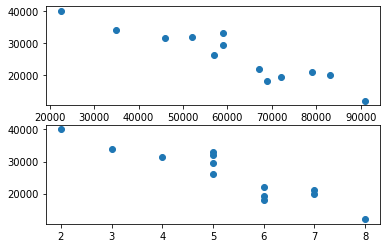

In [5]:
fig,ax= plt.subplots(2)
ax[0].scatter(cars_df['Mileage'],cars_df['Sell Price($)'])
ax[1].scatter(cars_df['Age(yrs)'],cars_df['Sell Price($)']);

In [6]:
dummy_df = pd.get_dummies(cars_df['Car Model'])

In [7]:
dummy_df

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [8]:
merge_df = pd.concat([cars_df,dummy_df], axis='columns')

In [9]:
merge_df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


Now we need to drop the carModel and one of the 'Mercedez BenzC class'

In [10]:
final_df = merge_df.drop(['Car Model','Mercedez Benz C class'], axis='columns')
final_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_rgr = LinearRegression()

In [13]:
x = final_df.drop(['Sell Price($)'], axis='columns')
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [14]:
y = final_df[['Sell Price($)']]
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [15]:
lin_rgr.fit(x,y)
print('coefficent',lin_rgr.coef_)
print('Intercept',lin_rgr.intercept_)

coefficent [[-3.70122094e-01 -1.33245363e+03 -2.45354074e+03 -6.73820733e+03]]
Intercept [58976.62596854]


Now lets predict value for '7900,7,0,0' means it is 'mercedize benz c class'

In [16]:
lin_rgr.predict([[79000,7,0,0]])

array([[20409.80511857]])

In [17]:
lin_rgr.score(x,y)

0.9417050937281082

### Now lets do it by sklearn 

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
le_df = cars_df

In [20]:
le_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [21]:
le.fit_transform(le_df['Car Model'])

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [22]:
le_df['Car Model'] = le.fit_transform(le_df['Car Model'])
le_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [23]:
x= le_df.drop(['Sell Price($)'], axis='columns').values
x

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [24]:
y= le_df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [25]:
from sklearn.preprocessing import OneHotEncoder


In [26]:
cars_df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [27]:
p_df = cars_df[['Sell Price($)','Age(yrs)']]

In [28]:
p_df

,Sell Price($),Age(yrs)
0,18000,6
1,34000,3
2,26100,5
3,40000,2
4,31500,4
5,29400,5
6,32000,5
7,19300,6
8,12000,8
9,22000,6


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x = p_df[['Age(yrs)']]
x

,Age(yrs)
0,6
1,3
2,5
3,2
4,4
5,5
6,5
7,6
8,8
9,6


In [31]:
y = p_df[['Age(yrs)']]
y

,Age(yrs)
0,6
1,3
2,5
3,2
4,4
5,5
6,5
7,6
8,8
9,6


In [32]:
train_x, test_x , train_y, test_y = train_test_split(x,y,test_size=0.5)

In [33]:
train_x

,Age(yrs)
9,6
7,6
0,6
6,5
10,7
1,3


In [34]:
from sklearn.linear_model import LinearRegression
lin_rgr = LinearRegression()

In [35]:
lin_rgr.fit(train_x,train_y)
print('coefficint',lin_rgr.coef_)
print('Intercept',lin_rgr.intercept_)

coefficint [[1.]]
Intercept [-2.66453526e-15]


In [36]:
y_hat = lin_rgr.predict(test_x)
y_hat

array([[5.],
       [2.],
       [5.],
       [7.],
       [8.],
       [4.],
       [5.]])

In [37]:
test_y

,Age(yrs)
2,5
3,2
5,5
11,7
8,8
4,4
12,5


In [38]:
mae= np.sum(np.absolute(y_hat-test_y))
mae

Age(yrs)    6.217249e-15
dtype: float64

# Logistic regression

In [39]:
hr_df = pd.read_csv(r'C:\Users\Ayush Yadav\Desktop\PYFe\Untitled Folder\Data\ML data\HR_comma_sep.csv')
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [40]:
hr_df.shape

(14999, 10)

In [41]:
hr_df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [42]:
hr_df['left'].unique()

array([1, 0], dtype=int64)

In [43]:
hr_df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [44]:
hr_df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [45]:
hr_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Satisfaction level and promotion_last_5years

In [46]:
#pd.crosstab(hr_df.salary,hr_df.left).plot(kind='bar');


In [47]:
pd.crosstab(hr_df.salary,hr_df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


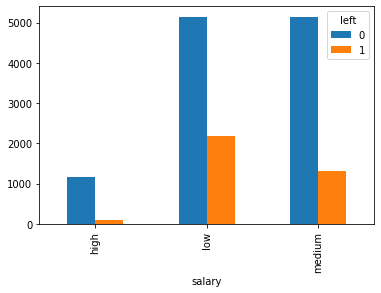

In [48]:
pd.crosstab(hr_df.salary,hr_df.left).plot(kind='bar');

In [49]:
ch_df = pd.crosstab(hr_df.Department,hr_df.left)
ch_df

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<AxesSubplot:xlabel='Department'>

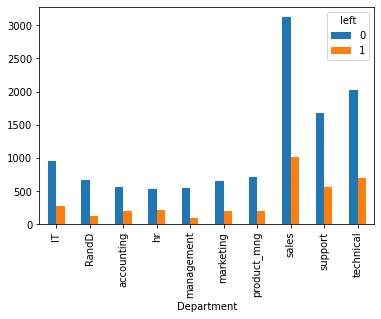

In [50]:
pd.crosstab(hr_df.Department,hr_df.left).plot(kind='bar')

In [51]:
hr_df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


By above observation we can conclude that the main factors are 'satisfaction_level,average_montly_hours,promotion_last_5years and salary'. We will use logistic regression here

In [52]:
main_df = hr_df[[ 'satisfaction_level','average_montly_hours','promotion_last_5years' ,'salary','left']]
main_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


In [53]:
dummy_df = pd.get_dummies(main_df['salary'])
dummy_df

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


## Now concatenate above two data frame

In [54]:
rgr_df = pd.concat([main_df,dummy_df], axis='columns').drop(['salary','high'], axis='columns')
rgr_df

,satisfaction_level,average_montly_hours,promotion_last_5years,left,low,medium
0,0.38,157,0,1,1,0
1,0.80,262,0,1,0,1
2,0.11,272,0,1,0,1
3,0.72,223,0,1,1,0
4,0.37,159,0,1,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,1,1,0
14995,0.37,160,0,1,1,0
14996,0.37,143,0,1,1,0
14997,0.11,280,0,1,1,0


In [55]:
from sklearn.linear_model import LogisticRegression


In [56]:
log_rgr = LogisticRegression()

In [57]:
x = rgr_df.drop('left', axis=1)
x

,satisfaction_level,average_montly_hours,promotion_last_5years,low,medium
0,0.38,157,0,1,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,1,0
4,0.37,159,0,1,0
...,...,...,...,...,...
14994,0.40,151,0,1,0
14995,0.37,160,0,1,0
14996,0.37,143,0,1,0
14997,0.11,280,0,1,0


In [58]:
y = rgr_df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [59]:
train_x,test_x,train_y,test_y = train_test_split(x, y, test_size= 0.1)

In [60]:
train_x.shape

(13499, 5)

In [61]:
test_x.shape

(1500, 5)

In [62]:
train_y.shape

(13499,)

In [63]:
log_rgr.fit(train_x,train_y)


LogisticRegression()

In [64]:
y_hat = log_rgr.predict(test_x)

In [65]:
log_rgr.score(test_x,test_y)

0.7893333333333333

## load_digits data set

In [66]:
from sklearn.datasets import load_digits

In [67]:
digits = load_digits()

In [74]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [77]:
digits.data.shape

(1797, 64)

In [79]:
digits.images.shape

(1797, 8, 8)

In [80]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [81]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

<Figure size 432x288 with 0 Axes>

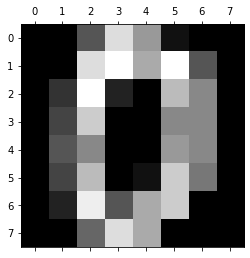

In [85]:
plt.gray()
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

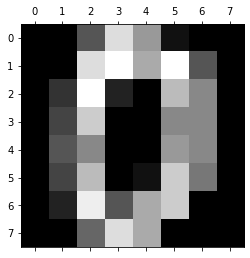

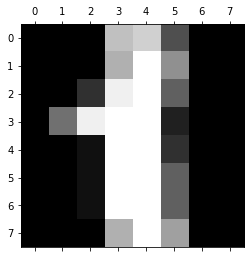

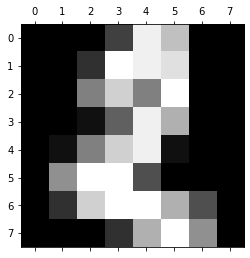

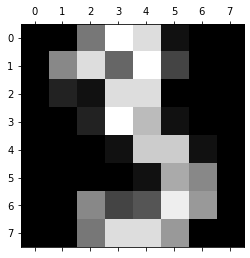

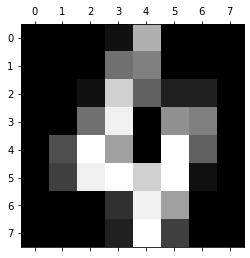

In [86]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
    

In [94]:
digits.target.shape

(1797,)

In [92]:
train_x,test_x, train_y, test_y = train_test_split(digits.data, digits.target, test_size=0.2)

In [93]:
train_x.shape

(1437, 64)

In [95]:
log_rgr.fit(train_x,train_y)

c:\users\ayush yadav\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
log_rgr.score(test_x,test_y)

0.9638888888888889

In [97]:
log_rgr.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [99]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

## Confusion matrix

In [100]:
y_predict = log_rgr.predict(test_x)

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_predict)


In [102]:
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  1,  0, 25,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  2,  1,  0,  0,  0, 34,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 43]], dtype=int64)

In [103]:
import seaborn as sns


Text(69.0, 0.5, 'True')

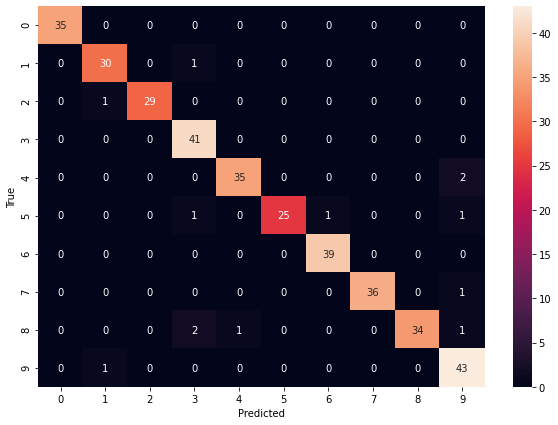

In [109]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('True')

## Irish Dataset logistics regression model

In [115]:
from sklearn.datasets import load_iris
#from sklearn.datasets import load_digits

In [117]:
dir(load_iris)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__']

In [120]:
type(load_iris)

function

In [121]:
flowers = load_iris()

In [122]:
type(flowers)

sklearn.utils.Bunch

In [123]:
dir(flowers)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [124]:
flowers.data.shape

(150, 4)

In [125]:
flowers.target.shape

(150,)

In [130]:
flowers.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [131]:
flowers.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [135]:
train_x, test_x, train_y, test_y = train_test_split(flowers.data, flowers.target, test_size=0.2)

In [137]:
train_x.shape

(120, 4)

In [138]:
log_rgr.fit(train_x,train_y)

c:\users\ayush yadav\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [139]:
log_rgr.score(test_x,test_y)

0.9333333333333333

In [149]:
log_rgr.predict(flowers.data[0:5])

array([0, 0, 0, 0, 0])

In [150]:
y_predict = log_rgr.predict(test_x)
y_predict

array([1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1,
       0, 1, 2, 2, 2, 2, 2, 0])

In [144]:
flowers.target[0:5]

array([0, 0, 0, 0, 0])

## Confusion matrix

In [146]:
from sklearn.metrics import confusion_matrix

In [151]:
cm = confusion_matrix(test_y, y_predict)

In [152]:
cm

array([[10,  0,  0],
       [ 0,  6,  1],
       [ 0,  1, 12]], dtype=int64)

Text(42.0, 0.5, 'True')

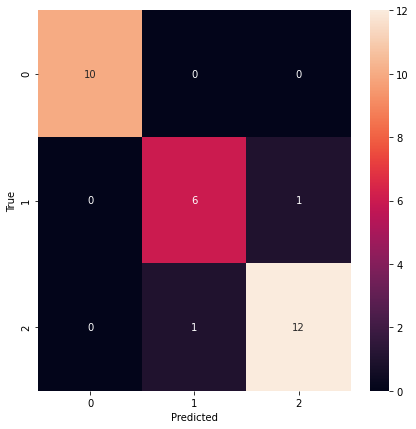

In [154]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('True')